In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from MiniTensorFlow import Sequential, Dense

In [2]:
def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


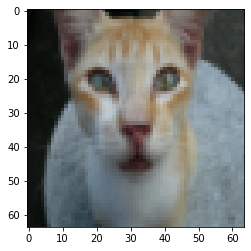

In [4]:
# Example of a picture
index = 11
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

y = 0. It's a non-cat picture.


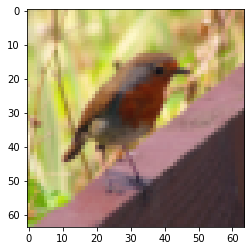

In [5]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [6]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [7]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [8]:
model = Sequential([
    Dense(units = 20, input_shape = 12288, activation = 'relu'),
    Dense(units = 7, activation = 'relu'),
    Dense(units = 5, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

In [9]:
model.fit(train_x, train_y, learning_rate = 0.0075, epochs = 2500, verbose = 1)

Epochs 0/2500 - Loss: 0.7717493284237686
Epochs 100/2500 - Loss: 0.6720534400822914
Epochs 200/2500 - Loss: 0.6482632048575212
Epochs 300/2500 - Loss: 0.6115068816101354
Epochs 400/2500 - Loss: 0.5670473268366111
Epochs 500/2500 - Loss: 0.5401376634547801
Epochs 600/2500 - Loss: 0.5279299569455267
Epochs 700/2500 - Loss: 0.46547737717668514
Epochs 800/2500 - Loss: 0.369125852495928
Epochs 900/2500 - Loss: 0.39174697434805344
Epochs 1000/2500 - Loss: 0.3151869888600617
Epochs 1100/2500 - Loss: 0.2726998441789385
Epochs 1200/2500 - Loss: 0.23741853400268137
Epochs 1300/2500 - Loss: 0.19960120532208644
Epochs 1400/2500 - Loss: 0.18926300388463305
Epochs 1500/2500 - Loss: 0.16118854665827748
Epochs 1600/2500 - Loss: 0.14821389662363316
Epochs 1700/2500 - Loss: 0.1377748781297294
Epochs 1800/2500 - Loss: 0.1297401754919012
Epochs 1900/2500 - Loss: 0.12122535068005215
Epochs 2000/2500 - Loss: 0.1138206066863371
Epochs 2100/2500 - Loss: 0.10783928526254132
Epochs 2200/2500 - Loss: 0.102854660

In [10]:
model.evaluate(test_x, test_y)

Loss: 0.7612524084552911 - Accuracy: 0.8


[array(0.76125241), 0.8]

The model predicts a "cat" picture.


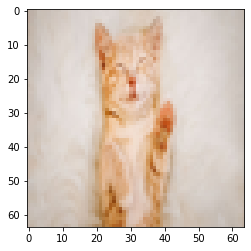

In [11]:
my_image = "cat_img.jpg" # change this to the name of your image file 

image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

Model_prediction = model.predict(image)


print ("The model predicts a \"" + classes[int(np.squeeze(Model_prediction)),].decode("utf-8") +  "\" picture.")

The model predicts a "non-cat" picture.


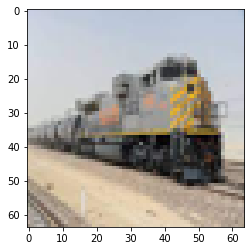

In [12]:
my_image = "train_img.jpg" # change this to the name of your image file 

image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

Model_prediction = model.predict(image)


print ("The model predicts a \"" + classes[int(np.squeeze(Model_prediction)),].decode("utf-8") +  "\" picture.")